# Rescaled beta

The goal of the analysis is to check the distribution of the rescaled beta


## Data loading

The data required for the analysis is loaded from the `computed maf` dataset.


In [ ]:
from gentropy.common.session import Session

from manuscript_methods.datasets import LeadVariantEffect


Loading BokehJS ...

In [2]:
session = Session(extended_spark_conf={"spark.driver.memory": "40G"})
lead_maf_dataset_path = "../../data/lead-maf-vep"


25/06/26 15:53:14 WARN Utils: Your hostname, mindos resolves to a loopback address: 127.0.1.1; using 192.168.0.100 instead (on interface eno1)
25/06/26 15:53:14 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/06/26 15:53:14 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
25/06/26 15:53:14 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
25/06/26 15:53:14 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.


In [3]:
session.spark


In [4]:
dataset_maf = LeadVariantEffect.from_parquet(session, lead_maf_dataset_path)
est_beta = dataset_maf.df.select(
    "rescaledStatistics.estimatedBeta", "rescaledStatistics.majorAlleleEstimatedBeta"
).toPandas()
est_beta.describe()


,estimatedBeta,majorAlleleEstimatedBeta
count,2.820468e+06,2.820468e+06
mean,2.379860e-01,2.816825e-01
std,3.452828e+00,3.449538e+00
min,-5.761040e+02,-5.761040e+02
25%,-5.982560e-01,-5.591089e-01
50%,1.981224e-02,2.576451e-02
75%,7.083032e-01,7.425731e-01
max,8.201783e+02,8.201783e+02


## Plot the distribution of estimated betas

The distribution of the rescaled beta is plotted using a histogram. The x-axis represents the rescaled beta values, while the y-axis shows the frequency of these values.

The y-axis is limited to the 1000, to see the distribution tails more clearly.

<img src="plots/01.2_rescaled_betas.jpg" width="600">


/home/mindos/Projects/OpenTargets/Gentropy-manuscript/.venv/lib/python3.11/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 5.35 x 4.5 in image.
/home/mindos/Projects/OpenTargets/Gentropy-manuscript/.venv/lib/python3.11/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: plots/01.2_rescaled_betas.jpg
/home/mindos/Projects/OpenTargets/Gentropy-manuscript/.venv/lib/python3.11/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_bin : Removed 13290 rows containing non-finite values.
/home/mindos/Projects/OpenTargets/Gentropy-manuscript/.venv/lib/python3.11/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_bin : Removed 13290 rows containing non-finite values.


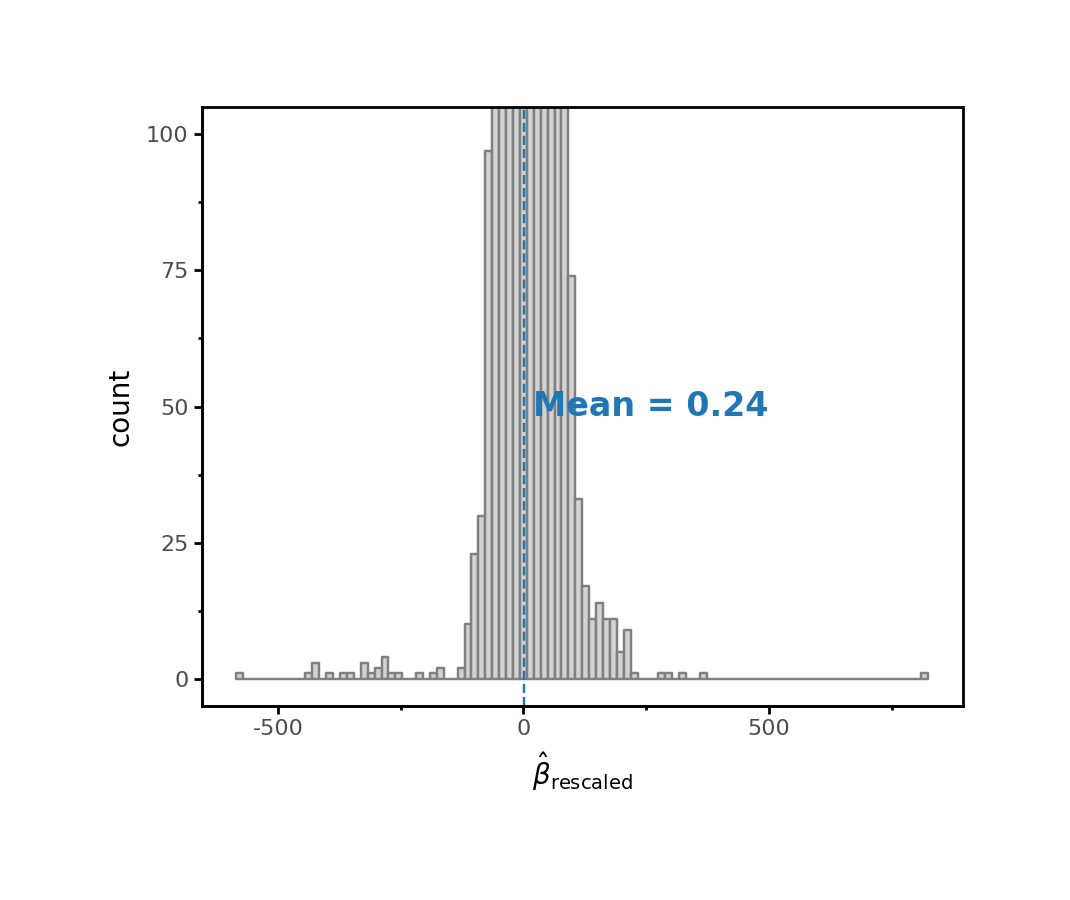

In [5]:
from plotnine import (
    aes,
    annotate,
    coord_cartesian,
    element_blank,
    element_line,
    element_rect,
    element_text,
    geom_histogram,
    geom_vline,
    ggplot,
    labs,
    theme,
)

REM = 10
mean_val = est_beta["estimatedBeta"].mean()
median_val = est_beta["estimatedBeta"].median()
xmax = est_beta["estimatedBeta"].max()
xmin = est_beta["estimatedBeta"].min()
ymax = 100

p = (
    ggplot(data=est_beta, mapping=aes(x="estimatedBeta"))
    + geom_histogram(
        bins=100,
        color="grey",
        fill="lightgray",
    )
    + coord_cartesian(ylim=(0, 100))  # limit y-axis to hide the spike
    + labs(x=r"$\hat{\beta}_{\mathrm{rescaled}}$")
    + geom_vline(xintercept=mean_val, color="#1f77b4", linetype="dashed", size=0.5, show_legend=True)
    + theme(
        # figure_size=(REM, REM*0.75),
        figure_size=(5.35, 4.5),  # ~85mm wide
        axis_title=element_text(size=REM * 1, family="sans-serif"),
        axis_text=element_text(size=REM * 0.8, family="sans-serif"),
        axis_ticks=element_line(color="black"),
        axis_line=element_line(color="black"),
        panel_background=element_rect(fill="white"),
        panel_border=element_rect(color="black", fill=None),
        panel_grid=element_blank(),
        # plot_margin=0.25,
        plot_margin=0.1,
    )
    + annotate(
        "text",
        x=mean_val + 20,
        y=50,
        label=f"Mean = {mean_val:.2f}",
        ha="left",
        size=12,
        color="#1f77b4",
        fontweight="bold",
    )
)


p.save("plots/01.2_rescaled_betas.jpg", dpi=300, bbox_inches="tight")
p


## Plot the major allele estimated beta

major allele estimated beta (similar for estimated beta, but swapped the sign of the beta when the effect allele is major)

<img src="plots/01.2_major_allele_rescaled_betas.jpg" width="600">

/home/mindos/Projects/OpenTargets/Gentropy-manuscript/.venv/lib/python3.11/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 5.35 x 4.5 in image.
/home/mindos/Projects/OpenTargets/Gentropy-manuscript/.venv/lib/python3.11/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: plots/01.2_major_allele_rescaled_betas.jpg
/home/mindos/Projects/OpenTargets/Gentropy-manuscript/.venv/lib/python3.11/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_bin : Removed 13290 rows containing non-finite values.
/home/mindos/Projects/OpenTargets/Gentropy-manuscript/.venv/lib/python3.11/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_bin : Removed 13290 rows containing non-finite values.


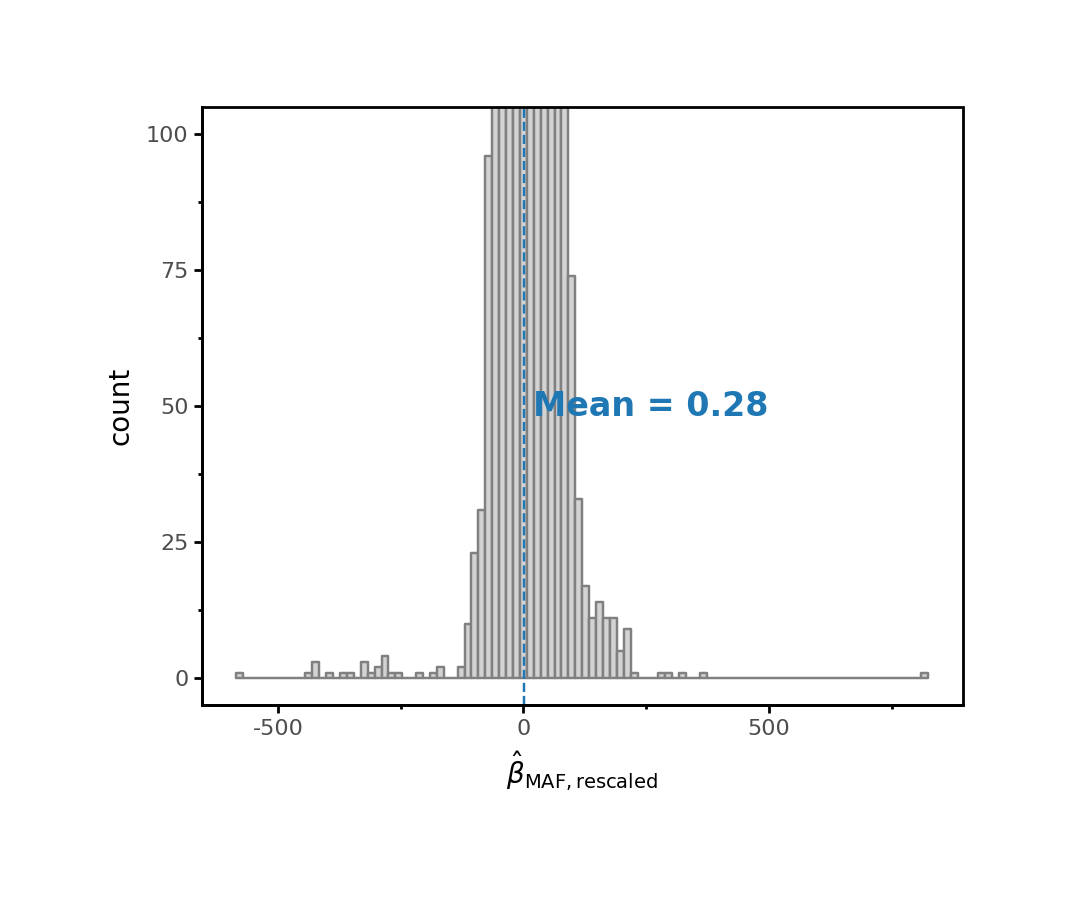

In [6]:
from plotnine import (
    aes,
    annotate,
    coord_cartesian,
    element_blank,
    element_line,
    element_rect,
    element_text,
    geom_histogram,
    geom_vline,
    ggplot,
    labs,
    theme,
)

REM = 10
mean_val = est_beta["majorAlleleEstimatedBeta"].mean()
median_val = est_beta["majorAlleleEstimatedBeta"].median()
xmax = est_beta["majorAlleleEstimatedBeta"].max()
xmin = est_beta["majorAlleleEstimatedBeta"].min()
ymax = 100

p = (
    ggplot(data=est_beta, mapping=aes(x="majorAlleleEstimatedBeta"))
    + geom_histogram(
        bins=100,
        color="grey",
        fill="lightgray",
    )
    + coord_cartesian(ylim=(0, 100))  # limit y-axis to hide the spike
    + labs(x=r"$\hat{\beta}_{\mathrm{MAF,rescaled}}$")
    + geom_vline(xintercept=mean_val, color="#1f77b4", linetype="dashed", size=0.5, show_legend=True)
    + theme(
        # figure_size=(REM, REM*0.75),
        figure_size=(5.35, 4.5),  # ~85mm wide
        axis_title=element_text(size=REM * 1, family="sans-serif"),
        axis_text=element_text(size=REM * 0.8, family="sans-serif"),
        axis_ticks=element_line(color="black"),
        axis_line=element_line(color="black"),
        panel_background=element_rect(fill="white"),
        panel_border=element_rect(color="black", fill=None),
        panel_grid=element_blank(),
        # plot_margin=0.25,
        plot_margin=0.1,
    )
    + annotate(
        "text",
        x=mean_val + 20,
        y=50,
        label=f"Mean = {mean_val:.2f}",
        ha="left",
        size=12,
        color="#1f77b4",
        fontweight="bold",
    )
)


p.save("plots/01.2_major_allele_rescaled_betas.jpg", dpi=300, bbox_inches="tight")
p


## Compare the two estimated betas

- calculate the correlation
- calculate the % of difference between the two betas

<img src="plots/01.2_betas_concordance.jpg" width="600">


In [7]:
corr = est_beta.corr()
corr


,estimatedBeta,majorAlleleEstimatedBeta
estimatedBeta,1.000000,0.938029
majorAlleleEstimatedBeta,0.938029,1.000000


In [8]:
group_stats = (
    group_statistics(
        dataset_maf.df.select(
            "rescaledStatistics.estimatedBeta", "rescaledStatistics.majorAlleleEstimatedBeta"
        ).withColumn(
            "betaMatch",
            f.when(f.col("estimatedBeta") == f.col("majorAlleleEstimatedBeta"), f.lit(True)).otherwise(False),
        ),
        f.col("betaMatch"),
    )
    .orderBy(f.desc("count"))
    .withColumn("percentage", f.concat_ws(" ", f.col("%"), f.lit("%")))
)

group_stats.show()


+---------+-------+-----+----------+
|betaMatch|  count|    %|percentage|
+---------+-------+-----+----------+
|     true|2093729|73.89|   73.89 %|
|    false| 740029|26.11|   26.11 %|
+---------+-------+-----+----------+



/home/mindos/Projects/OpenTargets/Gentropy-manuscript/.venv/lib/python3.11/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 5.35 x 4.5 in image.
/home/mindos/Projects/OpenTargets/Gentropy-manuscript/.venv/lib/python3.11/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: plots/01.2_betas_concordance.jpg


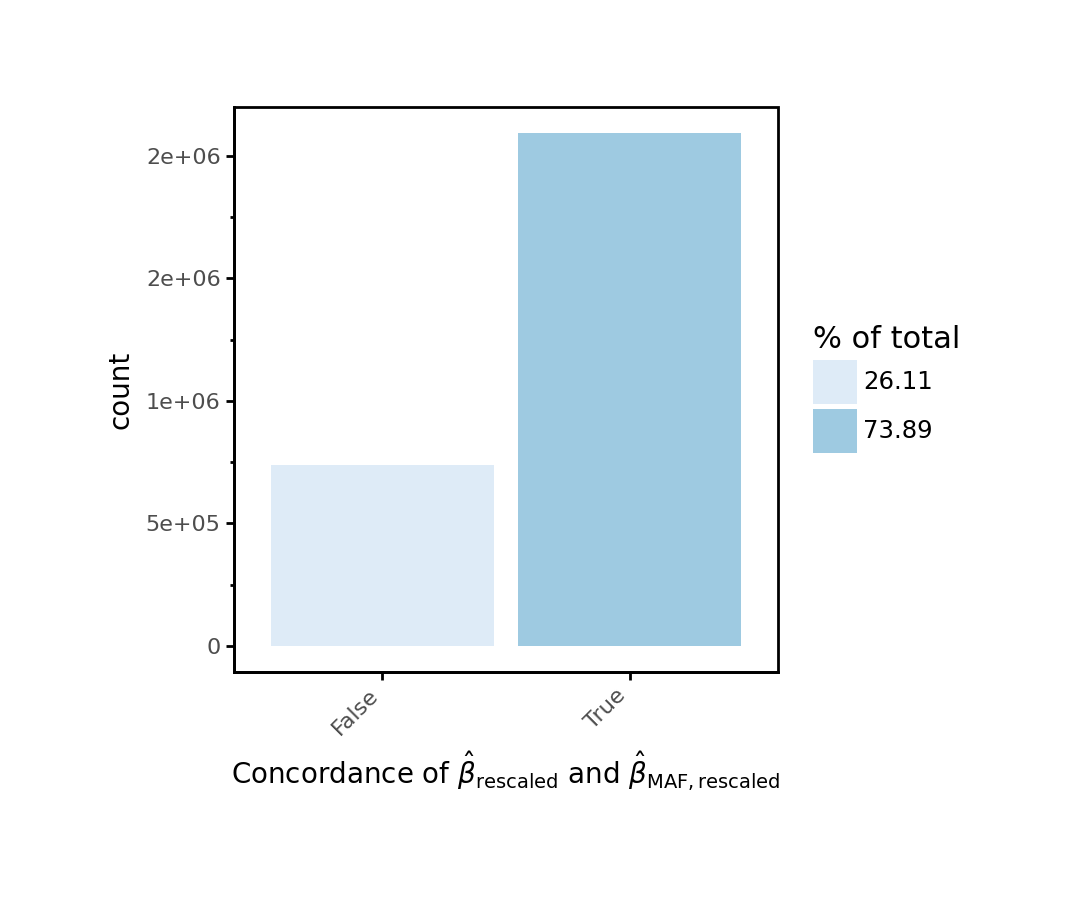

In [9]:
plot = plot_group_statistics(
    group_stats,
    "betaMatch",
    "count",
    "%",
    r"Concordance of $\hat{\beta}_{\mathrm{rescaled}}$ and $\hat{\beta}_{\mathrm{MAF,rescaled}}$",
)

plot.save("plots/01.2_betas_concordance.jpg", dpi=300, bbox_inches="tight")
plot
